In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

In [20]:
df_8 = pd.read_csv('datasets/8A_для_кластеризации.csv')
df_8

,Ученик,Средний балл за Сентябрь,Средний балл за Октябрь,Средний балл за Ноябрь,Средний балл за Декабрь,Средний балл за Январь,Средний балл за Февраль,Средний балл за Март,Средний балл за Апрель,Средний балл за Май,...,Общее кол-во 4 за 2 полугодие,Общее кол-во 3 за 2 полугодие,Общее кол-во 2 за 2 полугодие,Общее кол-во У за 2 полугодие,Общее кол-во Б за 2 полугодие,Общее кол-во Н за 2 полугодие,Среднее кол-во У в месяц,Среднее кол-во Б в месяц,Среднее кол-во Н в месяц,Успешный (нет предмета со ср. баллом < 3.5)
0,Ученик 1_8A,3.807018,3.600000,3.852941,3.666667,3.902439,3.839286,3.800000,3.830000,3.860000,...,55,61,7,0,126,21,2.111111,20.333333,2.555556,0
1,Ученик 2_8A,3.382979,3.212121,3.483871,3.316667,3.342857,3.300000,3.150000,3.261905,3.304878,...,30,115,26,11,64,25,4.888889,13.777778,2.888889,0
2,Ученик выбывший_8A,3.342105,3.378049,3.289474,3.370968,3.294118,3.531250,3.711538,3.387097,3.000000,...,32,47,15,237,35,25,37.875000,7.750000,3.125000,0
3,Ученик 3_8A,2.965517,2.972222,3.085366,3.166667,3.150000,3.048077,3.089744,3.108696,3.317073,...,32,132,48,7,0,8,3.250000,7.250000,1.125000,0
4,Ученица 4_8A,3.842593,3.702703,3.646341,3.576923,3.566667,3.518182,3.750000,3.525000,4.015152,...,54,85,18,39,0,8,11.500000,3.375000,1.000000,0
5,Ученик 5_8A,3.298246,3.076923,3.160377,3.350000,3.222222,3.163636,3.104167,3.238806,3.400000,...,31,115,33,28,46,12,11.500000,8.125000,1.500000,0
6,Ученица 6_8A,4.068966,4.093023,4.088235,4.056818,4.076923,3.845455,3.926471,3.913043,3.934211,...,80,56,10,18,0,4,3.600000,5.600000,0.800000,0
7,Ученик 7_8A,3.354839,3.170732,3.560000,3.548387,3.512195,3.486111,3.103448,3.562500,3.569444,...,43,88,19,14,73,11,5.875000,9.125000,1.500000,0
8,Ученица 8_8A,3.818182,3.686047,3.750000,3.642857,3.650000,3.310811,3.446429,3.600000,3.533333,...,50,64,17,70,89,43,14.888889,14.444444,6.888889,0
9,Ученик 9_8A,3.862069,3.701923,3.974576,3.914286,3.731707,3.754545,3.656250,4.078125,4.305556,...,64,58,22,38,0,2,11.142857,0.000000,0.285714,0


In [22]:
df_8 = df_8.drop(2)

In [24]:
def prepare_to_train_df(df):
    df_copy = df.copy() # Работаем с копией, чтобы не изменять исходный DataFrame
    df_copy['пол'] = 0
    df_copy.loc[df_copy['Ученик'].str.contains('Ученица'), 'пол'] = 1
    df_to_train = df_copy.drop(columns=['Ученик'])
    return df_to_train

def cluster_prepare(df):
    df_to_train = prepare_to_train_df(df)
    scaler = StandardScaler()
    scaled_df = scaler.fit_transform(df_to_train)
    elbow_method(scaled_df)
    silhouette_func(scaled_df)
    return scaled_df, df_to_train, scaler # Возвращаем как scaled_df, так и df_to_train

def elbow_method(scaled_df):
    inertia = []
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(scaled_df)
        inertia.append(kmeans.inertia_)

    plt.plot(range(1, 10), inertia, marker='o')
    plt.xlabel('Number of clusters ($k$)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()

def silhouette_func(scaled_df):
    silhouette_scores = []
    range_n_clusters = list(range(2, 10))

    for k in range_n_clusters:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(scaled_df)
        silhouette_avg = silhouette_score(scaled_df, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        print(f"Для n_clusters = {k}, средний силуэтный коэффициент: {silhouette_avg:.4f}")

    plt.figure(figsize=(8, 6))
    plt.plot(range_n_clusters, silhouette_scores, marker='o')
    plt.xlabel('Number of clusters ($k$)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score Method')
    plt.grid(True)
    plt.show()

def pca_vis(scaled_df, clusters, df_to_train):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(scaled_df)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
    plt.title('Clusters Visualization')
    plt.show()
    loadings = pca.components_
    loadings_df = pd.DataFrame(loadings, columns=df_to_train.columns, index=['PC1', 'PC2'])
    return loadings_df

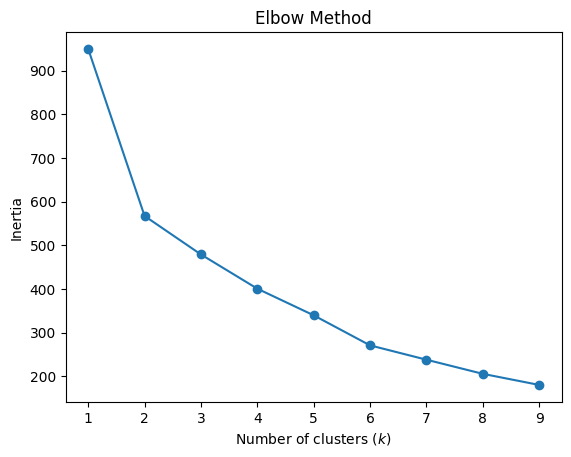

Для n_clusters = 2, средний силуэтный коэффициент: 0.3145
Для n_clusters = 3, средний силуэтный коэффициент: 0.3130
Для n_clusters = 4, средний силуэтный коэффициент: 0.2879
Для n_clusters = 5, средний силуэтный коэффициент: 0.1783
Для n_clusters = 6, средний силуэтный коэффициент: 0.1693
Для n_clusters = 7, средний силуэтный коэффициент: 0.1550
Для n_clusters = 8, средний силуэтный коэффициент: 0.1369
Для n_clusters = 9, средний силуэтный коэффициент: 0.1458


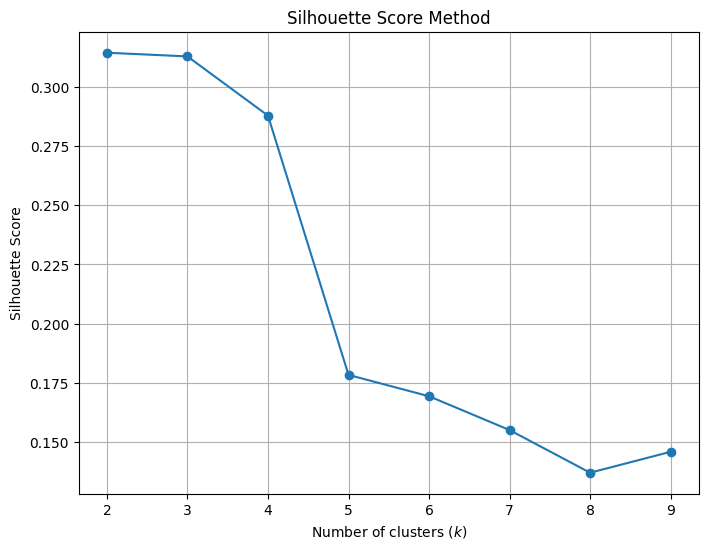

In [26]:
scaled_df_8, df_to_train_8, scaler = cluster_prepare(df_8.copy())

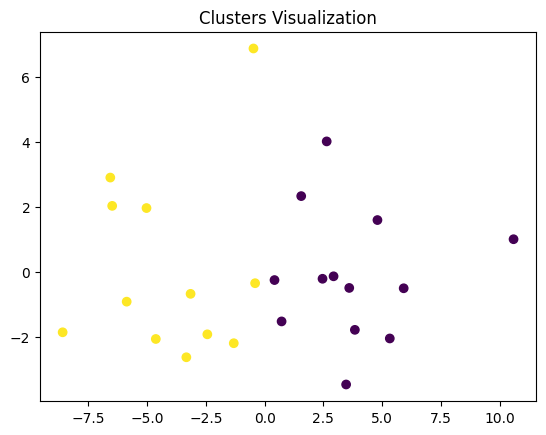

In [27]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_df_8)

df_pca = pca_vis(scaled_df_8, clusters, df_to_train_8)

In [28]:
df_pca

,Средний балл за Сентябрь,Средний балл за Октябрь,Средний балл за Ноябрь,Средний балл за Декабрь,Средний балл за Январь,Средний балл за Февраль,Средний балл за Март,Средний балл за Апрель,Средний балл за Май,Средний балл за 3 месяца (Сентябрь-Октябрь-Ноябрь),...,Общее кол-во 3 за 2 полугодие,Общее кол-во 2 за 2 полугодие,Общее кол-во У за 2 полугодие,Общее кол-во Б за 2 полугодие,Общее кол-во Н за 2 полугодие,Среднее кол-во У в месяц,Среднее кол-во Б в месяц,Среднее кол-во Н в месяц,Успешный (нет предмета со ср. баллом < 3.5),пол
PC1,0.206958,0.202010,0.208736,0.200675,0.201960,0.206092,0.187342,0.205736,0.186684,0.212382,...,-0.204794,-0.193932,0.091972,0.005825,-0.054192,0.068733,0.005317,-0.047560,0.101588,0.143529
PC2,0.012625,0.037287,0.019859,0.003102,0.055909,-0.002503,0.017507,-0.021530,-0.099334,0.023813,...,-0.098102,-0.101564,0.042250,0.311957,0.333923,-0.008548,0.331804,0.337193,0.038302,0.068376


In [29]:
sorted_pc1 = df_pca.loc['PC1'].sort_values(ascending=True)
sorted_pc2 = df_pca.loc['PC2'].sort_values(ascending=True)
sorted_pc1_abs = df_pca.loc['PC1'].abs().sort_values(ascending=False)
sorted_pc2_abs = df_pca.loc['PC2'].abs().sort_values(ascending=False)

In [106]:
df_sum = pd.read_csv('datasets/суммарный_для_кластеризации.csv')
df_sum

,Ученик,Средний балл за Сентябрь,Средний балл за Октябрь,Средний балл за Ноябрь,Средний балл за Декабрь,Средний балл за Январь,Средний балл за Февраль,Средний балл за Март,Средний балл за Апрель,Средний балл за Май,...,Общее кол-во 4 за 2 полугодие,Общее кол-во 3 за 2 полугодие,Общее кол-во 2 за 2 полугодие,Общее кол-во У за 2 полугодие,Общее кол-во Б за 2 полугодие,Общее кол-во Н за 2 полугодие,Среднее кол-во У в месяц,Среднее кол-во Б в месяц,Среднее кол-во Н в месяц,Успешный (нет предмета со ср. баллом < 3.5)
0,Ученик 1_8A,3.807018,3.600000,3.852941,3.666667,3.902439,3.839286,3.800000,3.830000,3.860000,...,55,61,7,0,126,21,2.111111,20.333333,2.555556,0
1,Ученик 2_8A,3.382979,3.212121,3.483871,3.316667,3.342857,3.300000,3.150000,3.261905,3.304878,...,30,115,26,11,64,25,4.888889,13.777778,2.888889,0
2,Ученик 3_8A,2.965517,2.972222,3.085366,3.166667,3.150000,3.048077,3.089744,3.108696,3.317073,...,32,132,48,7,0,8,3.250000,7.250000,1.125000,0
3,Ученица 4_8A,3.842593,3.702703,3.646341,3.576923,3.566667,3.518182,3.750000,3.525000,4.015152,...,54,85,18,39,0,8,11.500000,3.375000,1.000000,0
4,Ученик 5_8A,3.298246,3.076923,3.160377,3.350000,3.222222,3.163636,3.104167,3.238806,3.400000,...,31,115,33,28,46,12,11.500000,8.125000,1.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Ученица 19_11A,4.108108,3.967391,4.135135,4.138889,4.142857,4.200000,4.120000,3.909091,3.973753,...,32,25,2,6,0,0,5.333333,0.000000,0.666667,0
92,Ученица 20_11A,3.440000,3.708333,3.595238,3.937500,3.675676,3.800000,3.605263,3.750000,3.973753,...,33,27,13,0,22,0,0.333333,11.333333,0.333333,0
93,Ученик 21_11A,4.111111,3.532609,3.627907,3.925926,3.680000,3.812500,3.812500,2.000000,3.973753,...,20,12,10,6,143,4,0.875000,23.375000,0.750000,0
94,Ученица 22_11A,4.160000,4.029412,4.035714,4.166667,4.090909,4.260870,4.384615,3.958333,3.973753,...,41,16,0,19,3,0,5.200000,6.400000,0.400000,1


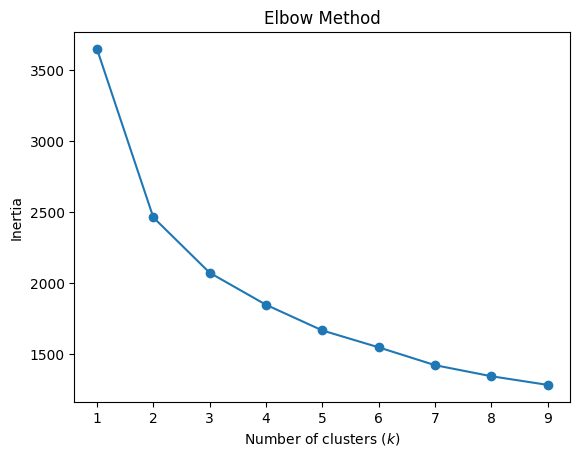

Для n_clusters = 2, средний силуэтный коэффициент: 0.2835
Для n_clusters = 3, средний силуэтный коэффициент: 0.1917
Для n_clusters = 4, средний силуэтный коэффициент: 0.1933
Для n_clusters = 5, средний силуэтный коэффициент: 0.1904
Для n_clusters = 6, средний силуэтный коэффициент: 0.1657
Для n_clusters = 7, средний силуэтный коэффициент: 0.1843
Для n_clusters = 8, средний силуэтный коэффициент: 0.1804
Для n_clusters = 9, средний силуэтный коэффициент: 0.1775


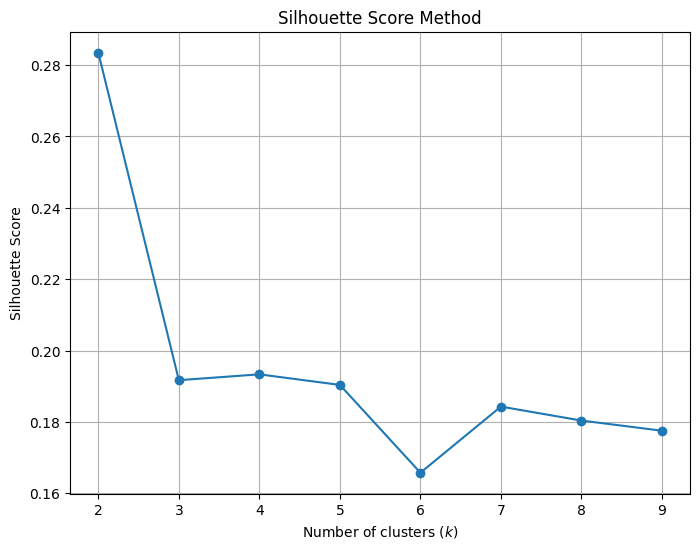

In [108]:
scaled_df_sum, df_to_train_sum, scaler = cluster_prepare(df_sum.copy())

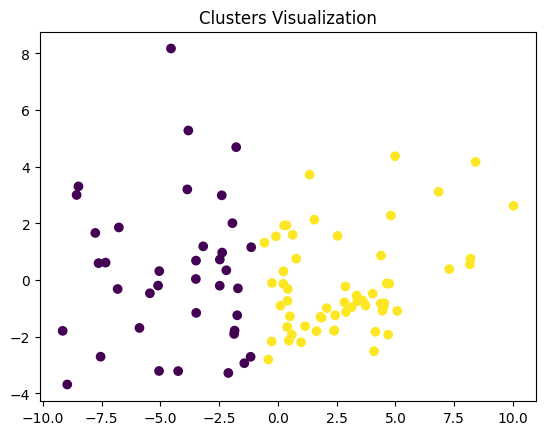

In [109]:
kmeans_sum = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters_sum = kmeans_sum.fit_predict(scaled_df_sum)
df_pca_sum = pca_vis(scaled_df_sum, clusters_sum, df_to_train_sum)

In [110]:
df_pca_sum

,Средний балл за Сентябрь,Средний балл за Октябрь,Средний балл за Ноябрь,Средний балл за Декабрь,Средний балл за Январь,Средний балл за Февраль,Средний балл за Март,Средний балл за Апрель,Средний балл за Май,Средний балл за 3 месяца (Сентябрь-Октябрь-Ноябрь),...,Общее кол-во 3 за 2 полугодие,Общее кол-во 2 за 2 полугодие,Общее кол-во У за 2 полугодие,Общее кол-во Б за 2 полугодие,Общее кол-во Н за 2 полугодие,Среднее кол-во У в месяц,Среднее кол-во Б в месяц,Среднее кол-во Н в месяц,Успешный (нет предмета со ср. баллом < 3.5),пол
PC1,0.217788,0.221702,0.221439,0.220293,0.217881,0.222173,0.211471,0.197581,0.156935,0.228136,...,-0.179441,-0.202347,-0.032108,-0.067649,-0.085709,-0.036110,-0.074869,-0.077425,0.143824,0.085049
PC2,0.049931,0.002626,0.042746,0.040627,0.062098,0.050990,0.045818,0.076684,-0.010812,0.032383,...,0.027179,-0.052642,0.263704,0.238814,0.296144,0.279408,0.196894,0.285826,0.052669,0.043329


In [111]:
sorted_pc1_sum = df_pca_sum.loc['PC1'].sort_values(ascending=True)
sorted_pc2_sum = df_pca_sum.loc['PC2'].sort_values(ascending=True)
sorted_pc1_abs_sum = df_pca_sum.loc['PC1'].abs().sort_values(ascending=False)
sorted_pc2_abs_sum = df_pca_sum.loc['PC2'].abs().sort_values(ascending=False)

In [112]:
sorted_pc1_abs_sum

Средний балл за 3 месяца (Сентябрь-Октябрь-Ноябрь)    0.228136
Средний балл за 3 месяца (Декабрь-Январь-Февраль)     0.227177
Средний балл за Февраль                               0.222173
Средний балл за Октябрь                               0.221702
Средний балл за Ноябрь                                0.221439
Средний балл за Декабрь                               0.220293
Общее кол-во 3 за 1 полугодие                         0.219604
Средний балл за Январь                                0.217881
Средний балл за Сентябрь                              0.217788
Средний балл за 3 месяца (Март-Апрель-Май)            0.215139
Средний балл за Март                                  0.211471
Общее кол-во 2 за год                                 0.208785
Общее кол-во 5 за 1 полугодие                         0.208750
Общее кол-во 3 за год                                 0.208126
Общее кол-во 5 за год                                 0.205025
Общее кол-во 2 за 1 полугодие                         0

In [113]:
sorted_pc2_abs_sum

Общее кол-во Н за год                                 0.361695
Общее кол-во У за год                                 0.338355
Общее кол-во У за 1 полугодие                         0.311969
Общее кол-во Н за 2 полугодие                         0.296144
Среднее кол-во Н в месяц                              0.285826
Среднее кол-во У в месяц                              0.279408
Общее кол-во У за 2 полугодие                         0.263704
Общее кол-во Б за год                                 0.241872
Общее кол-во Б за 2 полугодие                         0.238814
Общее кол-во Н за 1 полугодие                         0.197827
Среднее кол-во Б в месяц                              0.196894
Общее кол-во 4 за 1 полугодие                         0.179971
Общее кол-во Б за 1 полугодие                         0.172670
Общее кол-во 4 за год                                 0.126518
Общее кол-во 5 за 2 полугодие                         0.106252
Средний балл за 3 месяца (Март-Апрель-Май)            0

In [114]:
df_sum['Успешный (по итогам кластеризации)'] = clusters_sum

In [115]:
df_sum

,Ученик,Средний балл за Сентябрь,Средний балл за Октябрь,Средний балл за Ноябрь,Средний балл за Декабрь,Средний балл за Январь,Средний балл за Февраль,Средний балл за Март,Средний балл за Апрель,Средний балл за Май,...,Общее кол-во 3 за 2 полугодие,Общее кол-во 2 за 2 полугодие,Общее кол-во У за 2 полугодие,Общее кол-во Б за 2 полугодие,Общее кол-во Н за 2 полугодие,Среднее кол-во У в месяц,Среднее кол-во Б в месяц,Среднее кол-во Н в месяц,Успешный (нет предмета со ср. баллом < 3.5),Успешный (по итогам кластеризации)
0,Ученик 1_8A,3.807018,3.600000,3.852941,3.666667,3.902439,3.839286,3.800000,3.830000,3.860000,...,61,7,0,126,21,2.111111,20.333333,2.555556,0,0
1,Ученик 2_8A,3.382979,3.212121,3.483871,3.316667,3.342857,3.300000,3.150000,3.261905,3.304878,...,115,26,11,64,25,4.888889,13.777778,2.888889,0,0
2,Ученик 3_8A,2.965517,2.972222,3.085366,3.166667,3.150000,3.048077,3.089744,3.108696,3.317073,...,132,48,7,0,8,3.250000,7.250000,1.125000,0,0
3,Ученица 4_8A,3.842593,3.702703,3.646341,3.576923,3.566667,3.518182,3.750000,3.525000,4.015152,...,85,18,39,0,8,11.500000,3.375000,1.000000,0,0
4,Ученик 5_8A,3.298246,3.076923,3.160377,3.350000,3.222222,3.163636,3.104167,3.238806,3.400000,...,115,33,28,46,12,11.500000,8.125000,1.500000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Ученица 19_11A,4.108108,3.967391,4.135135,4.138889,4.142857,4.200000,4.120000,3.909091,3.973753,...,25,2,6,0,0,5.333333,0.000000,0.666667,0,1
92,Ученица 20_11A,3.440000,3.708333,3.595238,3.937500,3.675676,3.800000,3.605263,3.750000,3.973753,...,27,13,0,22,0,0.333333,11.333333,0.333333,0,0
93,Ученик 21_11A,4.111111,3.532609,3.627907,3.925926,3.680000,3.812500,3.812500,2.000000,3.973753,...,12,10,6,143,4,0.875000,23.375000,0.750000,0,0
94,Ученица 22_11A,4.160000,4.029412,4.035714,4.166667,4.090909,4.260870,4.384615,3.958333,3.973753,...,16,0,19,3,0,5.200000,6.400000,0.400000,1,1


In [117]:
# Получаем центроиды кластеров
centroids = kmeans_sum.cluster_centers_

original_scale_centroids = scaler.inverse_transform(centroids)
original_scale_centroids_df = pd.DataFrame(original_scale_centroids, columns=df_to_train_sum.columns)
original_scale_centroids_df.index.name = 'Cluster'
original_scale_centroids_df.index = original_scale_centroids_df.index + 1
original_scale_centroids_df

,Средний балл за Сентябрь,Средний балл за Октябрь,Средний балл за Ноябрь,Средний балл за Декабрь,Средний балл за Январь,Средний балл за Февраль,Средний балл за Март,Средний балл за Апрель,Средний балл за Май,Средний балл за 3 месяца (Сентябрь-Октябрь-Ноябрь),...,Общее кол-во 3 за 2 полугодие,Общее кол-во 2 за 2 полугодие,Общее кол-во У за 2 полугодие,Общее кол-во Б за 2 полугодие,Общее кол-во Н за 2 полугодие,Среднее кол-во У в месяц,Среднее кол-во Б в месяц,Среднее кол-во Н в месяц,Успешный (нет предмета со ср. баллом < 3.5),пол
Cluster,,,,,,,,,,,,,,,,,,,,,
1,3.535760,3.436063,3.461134,3.584504,3.482327,3.432169,3.440876,3.319729,3.801915,3.477652,...,60.710526,22.842105,27.947368,39.157895,8.236842,8.202308,8.907665,1.822379,-1.387779e-16,0.289474
2,4.182246,4.150191,4.206184,4.228078,4.210989,4.132831,4.132150,4.051012,4.086337,4.179540,...,24.327586,6.068966,24.568966,14.068966,2.448276,6.829625,4.463191,0.893357,3.103448e-01,0.706897


In [119]:
print(original_scale_centroids_df.columns)

Index(['Средний балл за Сентябрь', 'Средний балл за Октябрь',
       'Средний балл за Ноябрь', 'Средний балл за Декабрь',
       'Средний балл за Январь', 'Средний балл за Февраль',
       'Средний балл за Март', 'Средний балл за Апрель', 'Средний балл за Май',
       'Средний балл за 3 месяца (Сентябрь-Октябрь-Ноябрь)',
       'Средний балл за 3 месяца (Декабрь-Январь-Февраль)',
       'Средний балл за 3 месяца (Март-Апрель-Май)', 'Общее кол-во 5 за год',
       'Общее кол-во 4 за год', 'Общее кол-во 3 за год',
       'Общее кол-во 2 за год', 'Общее кол-во У за год',
       'Общее кол-во Б за год', 'Общее кол-во Н за год',
       'Общее кол-во 5 за 1 полугодие', 'Общее кол-во 4 за 1 полугодие',
       'Общее кол-во 3 за 1 полугодие', 'Общее кол-во 2 за 1 полугодие',
       'Общее кол-во У за 1 полугодие', 'Общее кол-во Б за 1 полугодие',
       'Общее кол-во Н за 1 полугодие', 'Общее кол-во 5 за 2 полугодие',
       'Общее кол-во 4 за 2 полугодие', 'Общее кол-во 3 за 2 полугодие',
   

In [128]:
original_scale_centroids_df[['Среднее кол-во У в месяц', 'Среднее кол-во Б в месяц',
       'Среднее кол-во Н в месяц', 'Общее кол-во 5 за год', 'Общее кол-во 2 за год',]]

,Среднее кол-во У в месяц,Среднее кол-во Б в месяц,Среднее кол-во Н в месяц,Общее кол-во 5 за год,Общее кол-во 2 за год
Cluster,,,,,
1,8.202308,8.907665,1.822379,53.368421,44.105263
2,6.829625,4.463191,0.893357,122.431034,12.120690


In [130]:
df_sum

,Ученик,Средний балл за Сентябрь,Средний балл за Октябрь,Средний балл за Ноябрь,Средний балл за Декабрь,Средний балл за Январь,Средний балл за Февраль,Средний балл за Март,Средний балл за Апрель,Средний балл за Май,...,Общее кол-во 3 за 2 полугодие,Общее кол-во 2 за 2 полугодие,Общее кол-во У за 2 полугодие,Общее кол-во Б за 2 полугодие,Общее кол-во Н за 2 полугодие,Среднее кол-во У в месяц,Среднее кол-во Б в месяц,Среднее кол-во Н в месяц,Успешный (нет предмета со ср. баллом < 3.5),Успешный (по итогам кластеризации)
0,Ученик 1_8A,3.807018,3.600000,3.852941,3.666667,3.902439,3.839286,3.800000,3.830000,3.860000,...,61,7,0,126,21,2.111111,20.333333,2.555556,0,0
1,Ученик 2_8A,3.382979,3.212121,3.483871,3.316667,3.342857,3.300000,3.150000,3.261905,3.304878,...,115,26,11,64,25,4.888889,13.777778,2.888889,0,0
2,Ученик 3_8A,2.965517,2.972222,3.085366,3.166667,3.150000,3.048077,3.089744,3.108696,3.317073,...,132,48,7,0,8,3.250000,7.250000,1.125000,0,0
3,Ученица 4_8A,3.842593,3.702703,3.646341,3.576923,3.566667,3.518182,3.750000,3.525000,4.015152,...,85,18,39,0,8,11.500000,3.375000,1.000000,0,0
4,Ученик 5_8A,3.298246,3.076923,3.160377,3.350000,3.222222,3.163636,3.104167,3.238806,3.400000,...,115,33,28,46,12,11.500000,8.125000,1.500000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Ученица 19_11A,4.108108,3.967391,4.135135,4.138889,4.142857,4.200000,4.120000,3.909091,3.973753,...,25,2,6,0,0,5.333333,0.000000,0.666667,0,1
92,Ученица 20_11A,3.440000,3.708333,3.595238,3.937500,3.675676,3.800000,3.605263,3.750000,3.973753,...,27,13,0,22,0,0.333333,11.333333,0.333333,0,0
93,Ученик 21_11A,4.111111,3.532609,3.627907,3.925926,3.680000,3.812500,3.812500,2.000000,3.973753,...,12,10,6,143,4,0.875000,23.375000,0.750000,0,0
94,Ученица 22_11A,4.160000,4.029412,4.035714,4.166667,4.090909,4.260870,4.384615,3.958333,3.973753,...,16,0,19,3,0,5.200000,6.400000,0.400000,1,1


In [132]:
df_sum.to_csv('datasets/готовая_кластеризация.csv',index=False, encoding="utf-8-sig")